# Assignment: Trees
Do three questions.

**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?

2. How do trees handle non-linear relationships between variables? Compare this to linear models. 

3. Why is the Gini a good loss function for categorical target variables? 

4. Why do trees tend to overfit, and how can this tendency be constrained? 

5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates. 

6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?

7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

**Question 1 Responses**
1. Trees are built by starting with all the data at the root (the top) and then splitting it into smaller groups based on certain rules. At each step, the tree picks a feature and a value that best separates the data. This process repeats for each group, making more and more splits, until the groups are very small or meet some stopping rule. The result is a structure that looks like a tree, with branches leading to final decisions at the leaves.
2. Trees are great at modeling non-linear relationships because they split the data into smaller groups and can make different decisions in different parts of the data. They don’t try to fit a straight line like linear models do. Instead, trees can create complex shapes by combining many small decisions. Linear models are simpler and assume the relationship between input and output is always a straight line, which doesn’t work well for complicated patterns.
3. The Gini impurity measures how mixed the classes are in a group. A low Gini score means that most of the data in the group belongs to one class, which is what we want in classification. It helps the tree choose splits that make the groups purer, which is exactly why it works well for categorical targets. It overall helps the tree get better at separating the different classes.
4. Trees can overfit because they keep splitting the data until each group is very small, even if the split doesn’t help much. This means the tree learns noise and small details that don’t generalize well to new data. To prevent this, we can limit the depth of the tree, or set a minimum number of samples for splits, or use pruning to cut off parts of the tree that don’t add significant value. These steps help the tree focus on the most important patterns.
5. That statement is false, as trees can work well with both categorical and numerical variables. They can handle numerical features by checking if values are above or below a certain number. They’re flexible and they don’t assume the data follows any specific pattern, so they can perform well in many situations, not just when there are lots of categories.
6. Most trees use two branches because it makes the algorithm easier to design and understand. With just two options at each step, the tree can focus on finding the best single condition to split the data. Allowing more than two branches adds complexity and can make the model harder to interpret and train. Furthermore, binary splits also let trees build more flexible decision paths over time.
7. If a tree is extremely deep with many small branches and leaves, it might be overfitting because it's memorizing the training data. If it is too shallow or if has only a few splits, it might be underfitting and missing significant or important patterns. You can also check for overfitting by comparing the tree’s accuracy on training vs test data, seeing if it does great on training but poorly on test data. Looking at feature importance can additionally be helpful as, if the tree uses many weak features, it might not be generalizing well.

**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.

3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?

4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

5. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

6. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see. 

**Question 2 Responses**
- 1. There are 976 observations and 12 features in the dataset. The variables are Unnamed: 0, Make, Make_Year, Color, Body_Type, Mileage_Run, No_of_Owners, Seating_Capacity, Fuel_Type, Transmission', Transmission_Type, and Price. Here are the first few rows of the data showing car details like brand, year, mileage, and price.
- 3. The min_leaf choice of 5 acheives the highest $R^2$ value on the test data.
- 4. The $R^2$ value is 0.8253, and the RMSE is 141536.54. The density of the residuals is additionally symmetric and centered around 0.
- 5. The regression tree performs slightly better than linear regression on the test set. It has a higher  $R^2$ value and a lower RMSE. Regression trees are better at capturing non-linear relationships and interactions between features. Linear regression assumes a straight-line relationship between each input and the target, which can be too simple for real-world data like car prices. Thus in this case, the tree provides more accurate and flexible predictions.
- 6. The scatter plot shows that both models often give similar price predictions, but the regression tree sometimes predicts higher or lower prices than the linear model. This happens more for expensive cars, where the tree may be capturing more complex patterns that the linear model might be missing


Shape of the data (observations, variables): (976, 12)
Available variables: ['Unnamed: 0', 'Make', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run', 'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission', 'Transmission_Type', 'Price']
First few rows of data:
   Unnamed: 0        Make  Make_Year   Color  Body_Type  Mileage_Run  \
0           1  Volkswagen       2017  silver      sedan        44611   
1           2     Hyundai       2016     red  crossover        20305   
2           3       Honda       2019   white        suv        29540   
3           4     Renault       2017  bronze  hatchback        35680   
4           5     Hyundai       2017  orange  hatchback        25126   

  No_of_Owners  Seating_Capacity Fuel_Type Transmission Transmission_Type  \
0          1st                 5    diesel      7-Speed         Automatic   
1          1st                 5    petrol      5-Speed            Manual   
2          2nd                 5    petrol      5-Speed            M

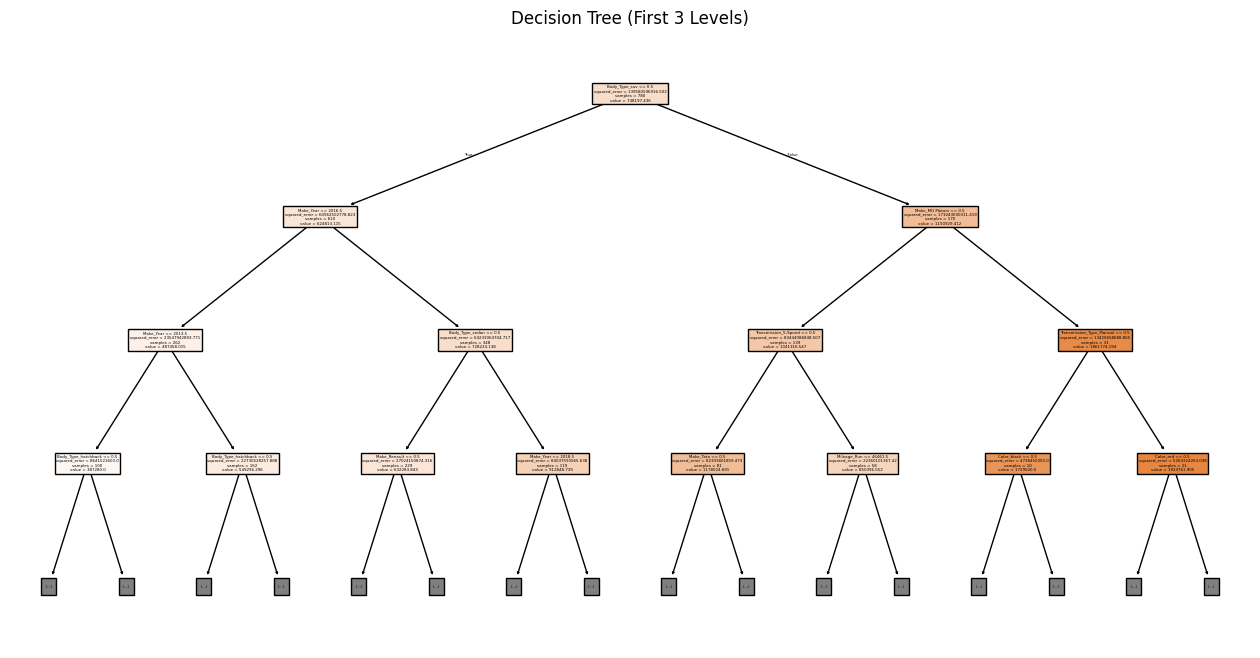

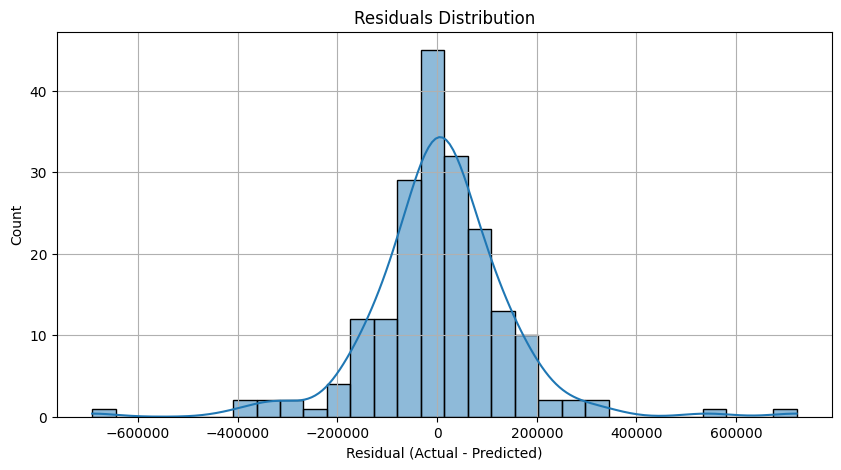

Linear Regression R^2: 0.8203
Linear Regression RMSE: 143575.20


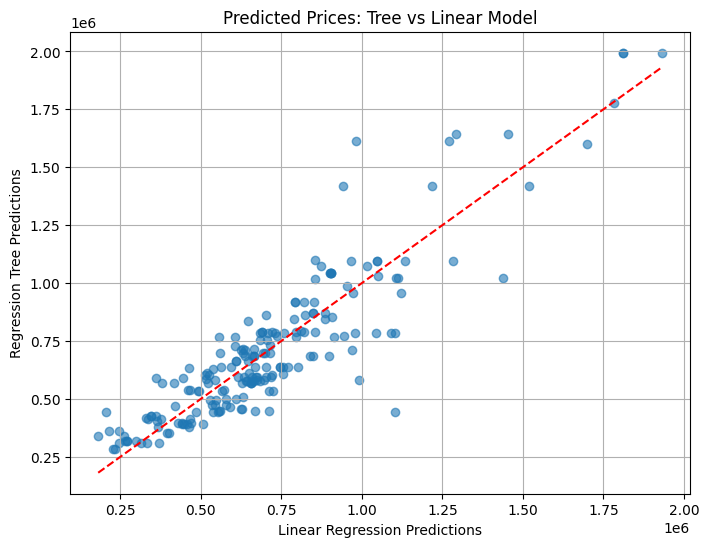

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor,  plot_tree
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from sklearn.linear_model import LinearRegression


#Q1
df = pd.read_csv("./data/cars_hw.csv")
print("Shape of the data (observations, variables):", df.shape)
print("Available variables:", df.columns.tolist())
print("First few rows of data:")
print(df.head())

#Q2

categorical_vars = ['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type']
numeric_vars = ['Mileage_Run', 'Make_Year', 'Seating_Capacity']
df_encoded = pd.get_dummies(df[categorical_vars + numeric_vars], drop_first=True)

target = df['Price']
X_train, X_test, y_train, y_test = train_test_split(df_encoded, target, test_size=0.2, random_state=42)

#Q3
r2_scores = []

for leaf_size in range(1, 26):
    model = DecisionTreeRegressor(min_samples_leaf=leaf_size, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    r2_scores.append(score)

best_leaf = list(range(1, 26))[r2_scores.index(max(r2_scores))]
best_r2 = max(r2_scores)

print(f"Best min_samples_leaf: {best_leaf}")
print(f"Highest R^2 on test data: {best_r2:.4f}")

#Q4
best_model = DecisionTreeRegressor(min_samples_leaf=best_leaf, random_state=42)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Test R^2: {r2:.4f}")
print(f"Test RMSE: {rmse:.2f}")

plt.figure(figsize=(16, 8))
plot_tree(best_model, filled=True, feature_names=X_train.columns, max_depth=3)
plt.title("Decision Tree (First 3 Levels)")
plt.show()

residuals = y_test - y_pred

plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Residuals Distribution")
plt.xlabel("Residual (Actual - Predicted)")
plt.grid(True)
plt.show()

#Q5

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred_lin = linreg.predict(X_test)

r2_lin = r2_score(y_test, y_pred_lin)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))

print(f"Linear Regression R^2: {r2_lin:.4f}")
print(f"Linear Regression RMSE: {rmse_lin:.2f}")

#Q6
y_pred_tree = best_model.predict(X_test)
y_pred_lin = linreg.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_lin, y_pred_tree, alpha=0.6)
plt.plot([y_pred_lin.min(), y_pred_lin.max()], [y_pred_lin.min(), y_pred_lin.max()], color='red', linestyle='--')
plt.xlabel("Linear Regression Predictions")
plt.ylabel("Regression Tree Predictions")
plt.title("Predicted Prices: Tree vs Linear Model")
plt.grid(True)
plt.show()


**Q3.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy? 

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

**Question 3 Responses:**
- 1. The dataset contains 2509 observations and 34 variables.
- 3. The accuracy is 0.5995
- 4. The model performs better in terms of specificity (more true negatives).
- 5. The $R^2$ value is 0.03, which means tht athe model explains only 3% of the changes in survival time, which is extremely low. In the scatter plot, most predictions are bunched up around 100–150 months, even when the actual survival times are much higher or lower. This shows that the model is not very accurate. For clinical use, this model would definitely not be helpful because it doesn’t give reliable predictions for individual patients.

Shape of the data (observations, variables): (2509, 34)
First few rows of the data:
  Patient ID  Age at Diagnosis Type of Breast Surgery    Cancer Type  \
0    MB-0000             75.65             Mastectomy  Breast Cancer   
1    MB-0002             43.19      Breast Conserving  Breast Cancer   
2    MB-0005             48.87             Mastectomy  Breast Cancer   
3    MB-0006             47.68             Mastectomy  Breast Cancer   
4    MB-0008             76.97             Mastectomy  Breast Cancer   

                        Cancer Type Detailed Cellularity Chemotherapy  \
0           Breast Invasive Ductal Carcinoma         NaN           No   
1           Breast Invasive Ductal Carcinoma        High           No   
2           Breast Invasive Ductal Carcinoma        High          Yes   
3  Breast Mixed Ductal and Lobular Carcinoma    Moderate          Yes   
4  Breast Mixed Ductal and Lobular Carcinoma        High          Yes   

  Pam50 + Claudin-low subtype  Cohort ER sta

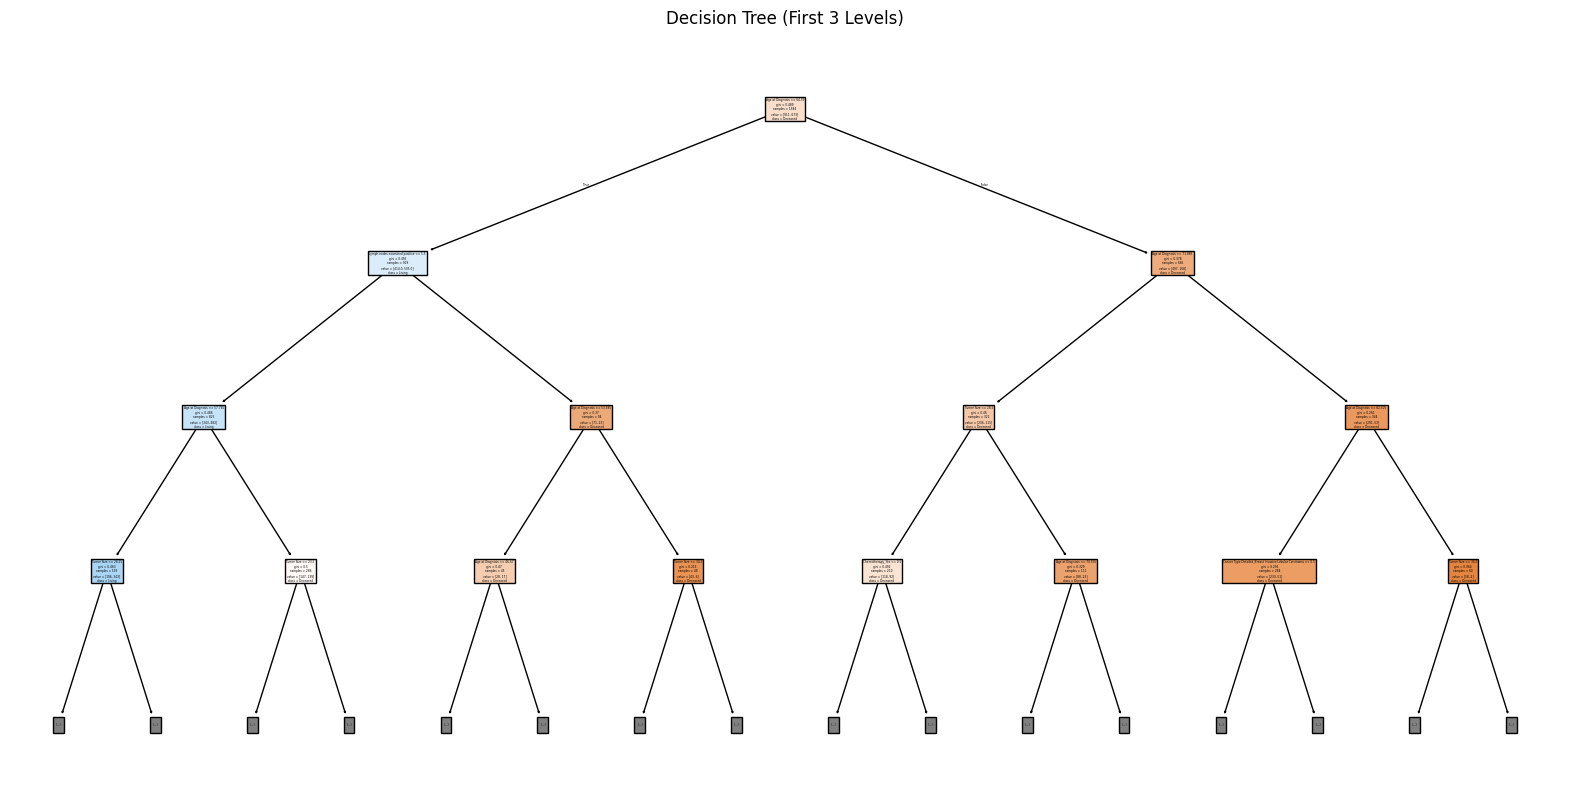

Confusion Matrix:
[[163  70]
 [ 89  75]]
Accuracy: 0.5995
True Positive Rate: 0.4573
True Negative Rate: 0.6996
Best min_samples_leaf: 25
Best R^2 on test data: 0.0300


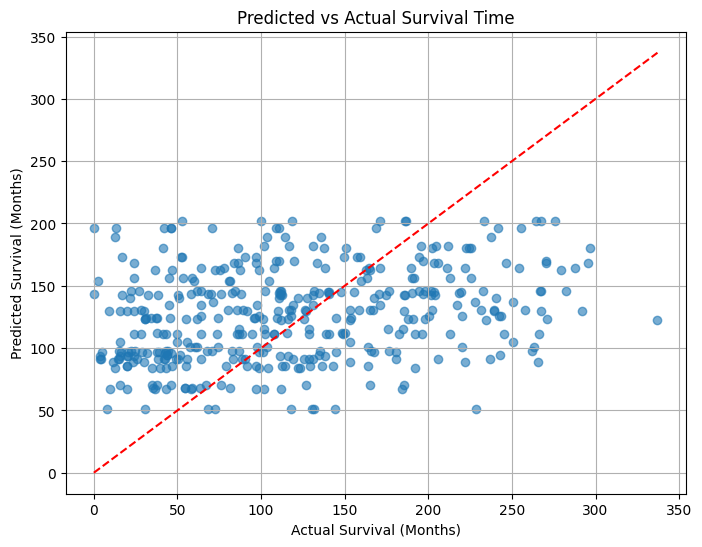

In [20]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#Q1
df = pd.read_csv("./data/Breast Cancer METABRIC.csv")
print("Shape of the data (observations, variables):", df.shape)
print("First few rows of the data:")
print(df.head())

#Q2
numeric_vars = ['Tumor Size', 'Lymph nodes examined positive', 'Age at Diagnosis']
categorical_vars = ['Tumor Stage', 'Chemotherapy', 'Cancer Type Detailed']
df_encoded = pd.get_dummies(df[categorical_vars], drop_first=True)
X = pd.concat([df[numeric_vars], df_encoded], axis=1)
print("Shape of feature matrix X:", X.shape)
print("First few rows of X:")
print(X.head())

#Q3
df_clean = df.dropna(subset=['Overall Survival Status'])
numeric_vars = ['Tumor Size', 'Lymph nodes examined positive', 'Age at Diagnosis']
categorical_vars = ['Tumor Stage', 'Chemotherapy', 'Cancer Type Detailed']
df_encoded = pd.get_dummies(df_clean[categorical_vars], drop_first=True)
X = pd.concat([df_clean[numeric_vars], df_encoded], axis=1)
y = df_clean['Overall Survival Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(min_samples_leaf=10, random_state=42)
clf.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True, max_depth=3)
plt.title("Decision Tree (First 3 Levels)")
plt.show()

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print(f"Accuracy: {acc:.4f}")

#Q4
tn, fp, fn, tp = cm.ravel()

tpr = tp / (tp + fn)
tnr = tn / (tn + fp)

print(f"True Positive Rate: {tpr:.4f}")
print(f"True Negative Rate: {tnr:.4f}")

#Q5
df_clean = df.dropna(subset=['Overall Survival (Months)'])

numeric_vars = ['Tumor Size', 'Lymph nodes examined positive', 'Age at Diagnosis']
categorical_vars = ['Tumor Stage', 'Chemotherapy', 'Cancer Type Detailed']
df_encoded = pd.get_dummies(df_clean[categorical_vars], drop_first=True)
X = pd.concat([df_clean[numeric_vars], df_encoded], axis=1)
y = df_clean['Overall Survival (Months)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

r2_scores = []
leaf_values = list(range(1, 26))

for leaf in leaf_values:
    model = DecisionTreeRegressor(min_samples_leaf=leaf, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2_scores.append(r2_score(y_test, y_pred))

best_leaf = leaf_values[np.argmax(r2_scores)]
best_r2 = max(r2_scores)

print(f"Best min_samples_leaf: {best_leaf}")
print(f"Best R^2 on test data: {best_r2:.4f}")

best_model = DecisionTreeRegressor(min_samples_leaf=best_leaf, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Survival (Months)")
plt.ylabel("Predicted Survival (Months)")
plt.title("Predicted vs Actual Survival Time")
plt.grid(True)
plt.show()

**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$. 

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

**Q5.** This is a case study about detecting fraud using classification trees. The goal is to predict the `class` variable, which is 0 for non-fraud and 1 for fraud.

1. Open `./data/creditcard_fraud.csv`. Print the number of observations and variables, and look at the first few rows of data. The variables are already normalized and de-identified, and are just called things like `V8` to protect the privacy of the clients.

2. Print a table of counts for the `class` variable and make a histogram. What percentage of transactions are fraudulent?

3. Drop `Time` and make a decision tree classifier to predict fraud. Print a confusion table and compute the accuracy. This is a serious **class imbalance** problem: The minority class is so small that essentially predicting 0's for all cases will achieve an extremely high accuracy. There are over-sampling techniques to deal with this issue, but we don't have time to cover them in class.

4. Imagine that you block every transaction in the test set labelled as fraudulent. How much money is (1) saved that should be saved, (2) lost to fraud anyway, (3) withheld in error from customers? Does implementing this anti-fraud system seem like a good idea, or not? Why?

5. Instead of predicting fraud, predict loss: Multiple the `Class` variable times the `Amount` variable, and call it `Loss`. Predict it using a decision tree regressor (making sure to drop Class, Time, and Loss from the features/covariates/predictors). What $R^2$ and RMSE do you get? Make a scatterplot of the predicted values on the test group versus the actual test values. Do you notice any interesting patterns? How could you use this algorithm to decide which transactions to block, and why?


**Q6.** Show that any decision tree is equivalent to a linear regression on a set of dummy variables that represent the optimal splits in the tree. 

Hint: You can think of CART as partitioning the feature space into a set of sets $\{S_1, S_2, ..., S_K\}$, and then predicting the average for all of the observations in each set $S_k$, $m_k$:
$$
\hat{y}(x) = \sum_{k=1}^K \mathbb{I}\{ x \text{ is in } S_k \} m_k
$$
where $\mathbb{I} \{ P(x,k)\}$ takes the value 1 if the proposition $P(x,k)$ is true and 0 otherwise. Now, doesn't that look like least-squares regression on a set of dummy/one-hot-encoded variables?

Conversely, can any linear regression be represented by a tree?